In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler




In [2]:
df = pd.read_csv(r'C:\Users\ramla\OneDrive\Desktop\Kais_DS\PYTHON_DS\checkpoints\fraud_project\creditcard.csv')
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [3]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Time','Amount', 'Class'], axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

df_resampled = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)
data=df_resampled

In [4]:
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [5]:
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [7]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,-2.313313,1.831751,-3.472003,2.239442,-1.576404,-0.715457,-2.750277,0.352175,-1.305860,-2.851965,...,0.186666,0.383751,-0.005178,-0.001667,-0.053436,0.041513,0.025271,0.095346,0.044529,0.5
std,5.473145,3.643714,6.186928,3.156510,4.148137,1.694684,5.753787,4.715422,2.290207,4.499585,...,1.019689,2.725730,1.129622,0.945975,0.542460,0.606971,0.446012,0.976283,0.426284,0.5
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0
25%,-2.753330,-0.112709,-5.024628,-0.079856,-1.752030,-1.531481,-2.977244,-0.184344,-2.299679,-4.602417,...,-0.180572,-0.160286,-0.512330,-0.218285,-0.383944,-0.289703,-0.271313,-0.059417,-0.051139,0.0
50%,-0.729345,0.985044,-1.376034,1.333218,-0.442560,-0.683271,-0.650909,0.163020,-0.724987,-0.885375,...,0.043072,0.155464,0.027723,-0.035508,-0.002891,0.053914,-0.011546,0.052510,0.036775,0.5
75%,1.033935,2.800383,0.338689,4.160996,0.464829,0.021911,0.279607,0.867305,0.139026,0.003352,...,0.422526,0.657339,0.538150,0.172793,0.347252,0.385669,0.306336,0.458357,0.215317,1.0
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.0


In [8]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [9]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [68]:
X = data.drop([ 'Class'], axis=1)
y = data['Class']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

### Feature scaling

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random forest method

### Training 

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, max_depth=10, max_features='sqrt', criterion='entropy')  # n_estimators==nb d'arbres
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10)

### Prediction

In [72]:
y_pred = classifier.predict(X_test)

### Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28313    70]
 [  706 27774]]


0.9863531646237448

# utiliser les top X

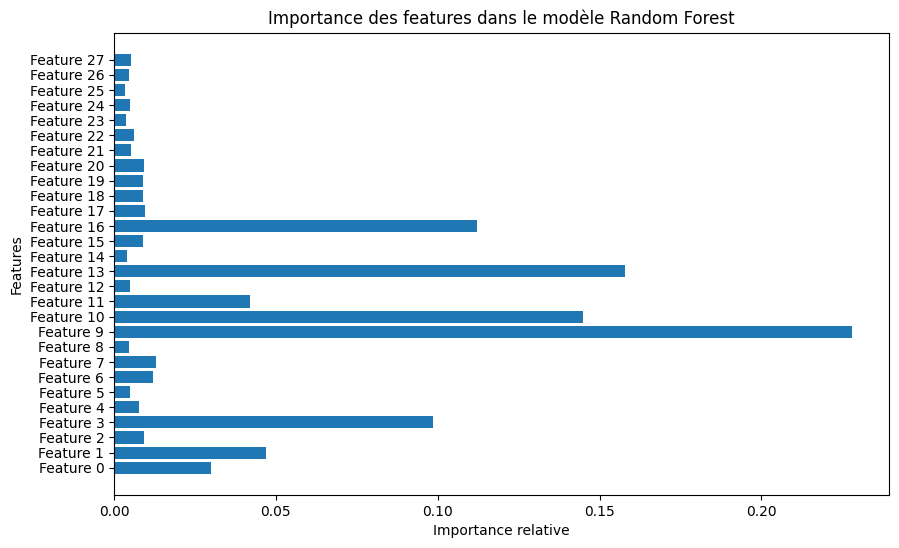

In [75]:

# Obtenir les importances des features
feature_importances = classifier.feature_importances_

# Afficher les importances des features sous forme de graphique
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importances, align='center')
plt.yticks(range(X.shape[1]), ['Feature {}'.format(i) for i in range(X.shape[1])])
plt.xlabel('Importance relative')
plt.ylabel('Features')
plt.title('Importance des features dans le modèle Random Forest')
plt.show()

In [76]:
#identify the indices of the top 10 features
top_feature_indices = np.argsort(feature_importances)[-10:]
#extract the top 10 features from the dataset
X_top_features_train = X_train[:, top_feature_indices]
X_top_features_test = X_test[:, top_feature_indices]
#retrain the model using only the top 10 features
classifier_top_features = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, random_state=73)
classifier_top_features.fit(X_top_features_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, random_state=73)

In [77]:
#evaluate the model on the test set
y_pred_top_features = classifier_top_features.predict(X_top_features_test)
#print the confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred_top_features))
print("Accuracy:", accuracy_score(y_test, y_pred_top_features))

[[28212   171]
 [ 2344 26136]]
Accuracy: 0.9557708879236059


In [78]:
import joblib
joblib.dump(classifier_top_features, 'classifier_top_features.joblib')
#save the indices of the top 10 features
np.save('top_feature_indices.npy', top_feature_indices)
print(top_feature_indices)

[ 6  7  0 11  1  3 16 10 13  9]


# LIGHT GBM method

In [17]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:

# Création du dataset LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [31]:

# Paramètres du modèle
params = {'objective': 'multiclass','num_class': 3,'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
   
}


In [32]:

# Entraînement du modèle
num_round = 10
classifier1 = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 511767, number of used features: 28
[LightGBM] [Info] Start training from score -0.692958
[LightGBM] [Info] Start training from score -0.693337
[LightGBM] [Info] Start training from score -34.538776


In [33]:

# Prédiction sur les données de test
y_pred = classifier1.predict(X_test, num_iteration=classifier1.best_iteration)
y_pred_class = [np.argmax(pred) for pred in y_pred]

In [34]:

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9784218208676996


# Catboost  method 

In [35]:
from catboost import CatBoostClassifier
classifier2 = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, loss_function='MultiClass', eval_metric='Accuracy', random_seed=42)

In [36]:

# Entraînement du modèle
classifier2.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.9368033	test: 0.9381320	best: 0.9381320 (0)	total: 180ms	remaining: 17.8s
1:	learn: 0.9399629	test: 0.9412799	best: 0.9412799 (1)	total: 350ms	remaining: 17.2s
2:	learn: 0.9462802	test: 0.9478044	best: 0.9478044 (2)	total: 525ms	remaining: 17s
3:	learn: 0.9459676	test: 0.9473647	best: 0.9478044 (2)	total: 796ms	remaining: 19.1s
4:	learn: 0.9460594	test: 0.9475230	best: 0.9478044 (2)	total: 1.08s	remaining: 20.6s
5:	learn: 0.9443008	test: 0.9457820	best: 0.9478044 (2)	total: 1.39s	remaining: 21.7s
6:	learn: 0.9456276	test: 0.9473999	best: 0.9478044 (2)	total: 1.68s	remaining: 22.3s
7:	learn: 0.9458093	test: 0.9468547	best: 0.9478044 (2)	total: 1.9s	remaining: 21.8s
8:	learn: 0.9459715	test: 0.9476109	best: 0.9478044 (2)	total: 2.15s	remaining: 21.8s
9:	learn: 0.9475582	test: 0.9492992	best: 0.9492992 (9)	total: 2.36s	remaining: 21.2s
10:	learn: 0.9470286	test: 0.9487189	best: 0.9492992 (9)	total: 2.57s	remaining: 20.8s
11:	learn: 0.9475640	test: 0.9489475	best: 0.9492992 (9)

In [25]:
# Prédiction sur les données de test
y_pred = classifier2.predict(X_test)

In [26]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9852628246838894


# XGBOOST method

In [60]:
import xgboost as xgb
classifier3 =  xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)

In [61]:
# Entraînement du modèle
classifier3.fit(X_train, y_train)

c:\Users\ramla\OneDrive\Desktop\Kais_DS\PYTHON_DS\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [62]:
# Prédiction sur les données de test
y_pred = classifier3.predict(X_test)

In [66]:
# Évaluation du modèle

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix: [[28112   271]
 [  589 27891]]
Accuracy Score: 0.9848759298665213
